# Clasificación Bayesiana

In [1]:
#Librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer #una función más avanzada que vectorizar así nomás
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [2]:
inmu = pd.read_csv("Clusters.csv")
inmu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           657 non-null    int64  
 1   Alcaldia             657 non-null    object 
 2   Colonia              657 non-null    object 
 3   X1                   657 non-null    float64
 4   X2                   657 non-null    float64
 5   X3                   657 non-null    float64
 6   X4                   657 non-null    float64
 7   X5                   657 non-null    float64
 8   X6                   657 non-null    float64
 9   X7                   657 non-null    float64
 10  X8                   657 non-null    float64
 11  X9                   657 non-null    float64
 12  X10                  657 non-null    float64
 13  Cocina_equip         657 non-null    int64  
 14  Gimnasio             657 non-null    int64  
 15  Amueblado            657 non-null    int

In [3]:
#Definición de variables
X = inmu[["Cocina_equip", "Gimnasio", "Amueblado", "Alberca", "Terraza", "Elevador", "Baños", "Recamaras", "Lugares_estac"]]
y = inmu["Conglomerados"]

In [4]:
#Sets de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Clasificadores
clasificadores = {
    'Naive Bayes Multinomial': MultinomialNB(),
}

In [6]:
# Entrenamiento y evaluación clasificadores
results = {}

for name, clf in clasificadores.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted') 
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    results[name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall (Sensibilidad)': recall
    }


c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
# Ver los resultados de exactitud, puntaje F1, precisión y sensibilidad
print("Comparación de Métricas:")
for name, metrics in results.items():
    print(f"Clasificador: {name}")
    print(f"Exactitud: {metrics['Accuracy']:.2f}")
    print(f"Puntaje F1: {metrics['F1 Score']:.2f}")
    print(f"Precisión: {metrics['Precision']:.2f}")
    print(f"Sensibilidad (Recall): {metrics['Recall (Sensibilidad)']:.2f}")
    print("\n")

Comparación de Métricas:
Clasificador: Naive Bayes Multinomial
Exactitud: 0.67
Puntaje F1: 0.62
Precisión: 0.58
Sensibilidad (Recall): 0.67




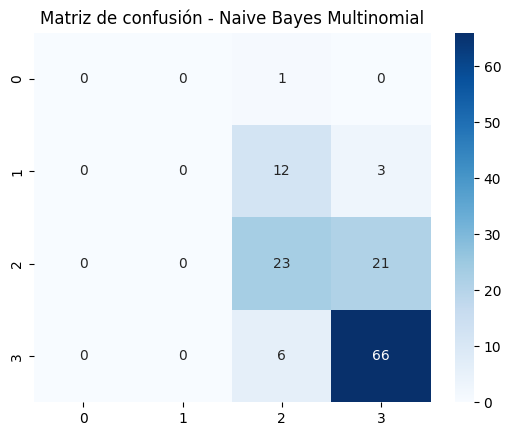

In [8]:
#Matriz de Confusión
clasificadores = {
    'Naive Bayes Multinomial': MultinomialNB(),
}

for name, clf in clasificadores.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de confusión - {name}')
    plt.show()

In [9]:
#Predicciones función
def predict_class_and_probabilities(nuevosDatos): 
    
    class_probabilities = clf.predict_proba([nuevosDatos])

    
    for class_idx, prob in enumerate(class_probabilities[0]):
        print(f'Probabilidad por clase {class_idx}: {prob:.4f}')

    
    predicted_class = clf.predict([nuevosDatos])[0]
    print(f'Clase Predicha: {predicted_class}')

In [10]:
#Observamos X para ingresar datos
X.head()

,Cocina_equip,Gimnasio,Amueblado,Alberca,Terraza,Elevador,Baños,Recamaras,Lugares_estac
0,1,1,0,0,1,1,2.0,3,2
1,1,0,0,0,0,0,1.0,2,1
2,1,1,0,0,1,1,3.0,3,3
3,0,0,0,0,0,0,1.0,2,1
4,0,0,0,0,0,0,1.0,2,1


In [11]:
#Ejemplo de predicción
ejemplo = [1, 0, 0, 1, 1, 1, 3, 3, 2]
predict_class_and_probabilities(ejemplo)

Probabilidad por clase 0: 0.0285
Probabilidad por clase 1: 0.3180
Probabilidad por clase 2: 0.5845
Probabilidad por clase 3: 0.0690
Clase Predicha: MedioAlto


c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
